In [1]:
#import the libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading the data
data = pd.read_csv('Alphabets_data.csv')

In [3]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
data.shape

(20000, 17)

In [5]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [6]:
data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [7]:
#checking for null values
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [8]:
# class distribution
print(data.groupby('letter').size())

letter
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
dtype: int64


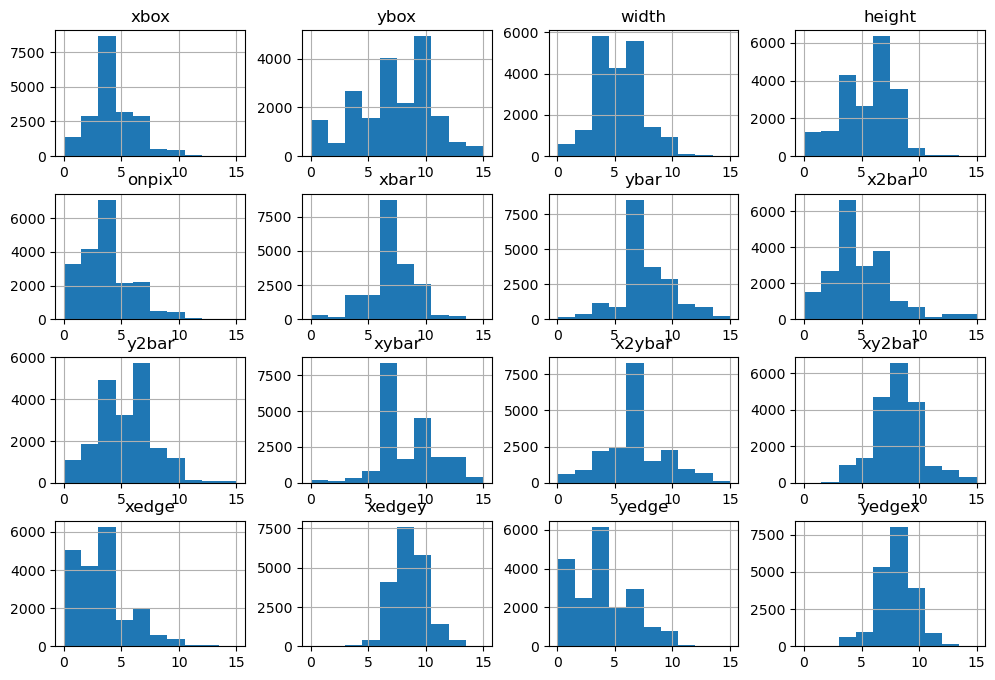

In [9]:
# plot histograms
data.hist(figsize=(12,8))
plt.show()

In [10]:
data['letter'].unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [11]:
#converting categorical column into numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
obj_list = ['letter']
for x in obj_list:
    data[x] = le.fit_transform(data[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature: ',x)
    print('Mapping: ',le_name_mapping)

Feature:  letter
Mapping:  {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [12]:
#splitting data into x and y
x = data.values[:,1:]
y = data.values[:,0]

In [13]:
x

array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ...,
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 2,  3,  4, ...,  9,  5,  8],
       [ 4,  9,  6, ...,  7,  2,  8]], dtype=int64)

In [14]:
y

array([19,  8,  3, ..., 19, 18,  0], dtype=int64)

In [15]:
print(x.shape)
print(y.shape)

(20000, 16)
(20000,)


In [16]:
#scaling the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x)
x = scaler.transform(x)

In [17]:
#split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
# create model
model = Sequential()

#hidden layer
model.add(Dense(128, input_dim = x_train.shape[1], activation='relu'))#1st layer
model.add(Dense(64, activation='relu'))#2nd layer

#output layer
model.add(Dense(26, activation='softmax'))#3rd layer

C:\Users\sheetal\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,122 (47.35 KB)

 Trainable params: 12,122 (47.35 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_split = 0.2)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4074 - loss: 2.1952 - val_accuracy: 0.7375 - val_loss: 0.9181
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7581 - loss: 0.8088 - val_accuracy: 0.8072 - val_loss: 0.6651
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8265 - loss: 0.5958 - val_accuracy: 0.8459 - val_loss: 0.5326
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8593 - loss: 0.4717 - val_accuracy: 0.8562 - val_loss: 0.4666
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8790 - loss: 0.3948 - val_accuracy: 0.8878 - val_loss: 0.3935
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8951 - loss: 0.3440 - val_accuracy: 0.8953 - val_loss: 0.3519
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9103 - loss: 0.2970 - val_accuracy: 0.9050 - val_loss: 0.3207
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9165 - loss: 0.2716 - val_accuracy: 0.

In [22]:
#Evaluate the model
scores = model.evaluate(x,y)
print("%s: %2f%%"%(model.metrics_names[1],scores[1]*100))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9775 - loss: 0.0812
compile_metrics: 97.635001%


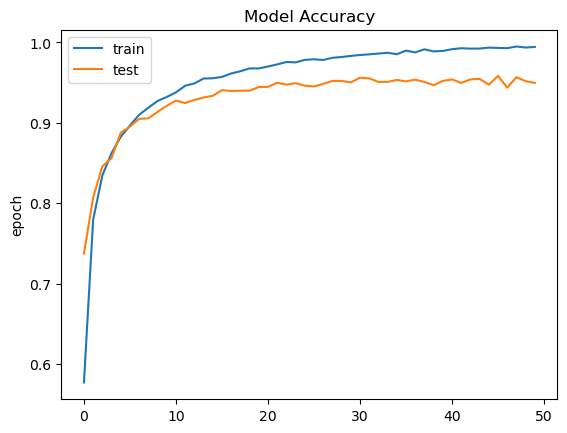

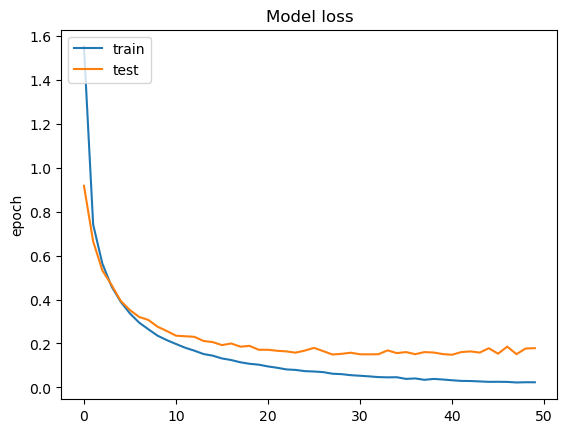

In [23]:
#summarize for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#summarize for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [24]:
# Predictions
y_pred_prob = model.predict(x_test)

# If predictions are probabilities, convert them to class labels
y_pred = y_pred_prob.argmax(axis=1)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model
print("Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")
print(classification_report(y_test, y_pred))


Model Performance:
Accuracy: 0.94975
Precision: 0.9513791905167759
Recall: 0.94975
F1-Score: 0.949899783693425
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       149
           1       0.88      0.95      0.92       153
           2       0.96      0.96      0.96       137
           3       0.98      0.88      0.93       156
           4       0.91      0.98      0.94       141
           5       0.94      0.92      0.93       140
           6       0.97      0.92      0.95       160
           7       0.92      0.82      0.87       144
           8       0.96      0.94      0.95       146
           9       0.97      0.95      0.96       149
          10       0.81      0.92      0.86       130
          11       0.99      0.96      0.97       155
          12       0.99      0.96      0.98       168
          13       0.94      0.95      0.94       151
          14       0.94      0.99      0.96       145
          15       0.94 

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='adam', activation='relu', neurons=64):
    model = Sequential()
    
    # Hidden layers
    model.add(Dense(neurons, input_dim=x_train.shape[1], activation=activation))  # 1st layer
    model.add(Dense(neurons, activation=activation))  # 2nd layer
    
    # Output layer
    model.add(Dense(26, activation='softmax'))  # Output layer with number of classes
    
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model


In [29]:
# Initialize KerasClassifier without passing parameters directly
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define grid search parameters
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [50, 100],
    'batch_size': [10, 20, 32, 40]
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit GridSearchCV
grid_result = grid.fit(x_train, y_train)

# Summarize results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Evaluate tuned model
best_model = grid_result.best_estimator_

# Use the predict method of the KerasClassifier instance
y_pred_tuned = best_model.predict(x_test)

C:\Users\sheetal\AppData\Roaming\Python\Python310\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\sheetal\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.9452501050344518 using {'batch_size': 20, 'epochs': 100, 'optimizer': 'rmsprop'}


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# If predictions are class labels directly, no need for argmax
# Otherwise, use argmax if the output is a probability distribution
if y_pred_tuned.ndim > 1 and y_pred_tuned.shape[1] > 1:
    y_pred_tuned_labels = y_pred_tuned.argmax(axis=1)
else:
    y_pred_tuned_labels = y_pred_tuned

print("Tuned Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned_labels)}")
print(f"Precision: {precision_score(y_test, y_pred_tuned_labels, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_tuned_labels, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned_labels, average='weighted')}")
print(classification_report(y_test, y_pred_tuned_labels))

Tuned Model Performance:
Accuracy: 0.956
Precision: 0.9569422506633464
Recall: 0.956
F1-Score: 0.9559896402161198
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       149
           1       0.94      0.92      0.93       153
           2       0.98      0.95      0.96       137
           3       0.94      0.96      0.95       156
           4       0.94      0.97      0.96       141
           5       0.90      0.98      0.94       140
           6       0.95      0.96      0.96       160
           7       0.93      0.89      0.91       144
           8       0.99      0.92      0.96       146
           9       0.94      0.96      0.95       149
          10       0.93      0.92      0.93       130
          11       0.96      0.98      0.97       155
          12       0.99      0.99      0.99       168
          13       0.98      0.96      0.97       151
          14       0.98      0.98      0.98       145
          15       0.